In [14]:
'''
1. Prepare the dataset for further experiments.

1) Read the given images, and collect the dataset from random sub-blocks.
2) Let the image value at the center pixel as the ground-truth label (y),
   and its adjacent pixel values as feature vector (x).
   Here, you can consider any size of sub-blocks (e.g., 3x3 or 5x5).
   Consider the following two cases : causal (left) and non-causal (right)
3) Generate the feature matrix and label vector as below. (Here, D = K/2 or D = K.)
'''


'\n1. Prepare the dataset for further experiments.\n\n1) Read the given images, and collect the dataset from random sub-blocks.\n2) Let the image value at the center pixel as the ground-truth label (y),\n   and its adjacent pixel values as feature vector (x).\n   Here, you can consider any size of sub-blocks (e.g., 3x3 or 5x5).\n   Consider the following two cases : causal (left) and non-causal (right)\n3) Generate the feature matrix and label vector as below. (Here, D = K/2 or D = K.)\n'

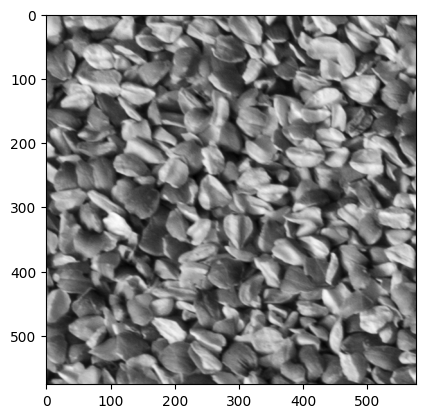

Collected patches shape: (1000, 3, 3)
Some extracted patches:


array([[[127, 143, 154],
        [130, 155, 158],
        [128, 153, 158]],

       [[168, 167, 163],
        [165, 164, 158],
        [167, 160, 156]],

       [[150, 145, 145],
        [147, 145, 140],
        [151, 147, 141]],

       ...,

       [[162, 147, 131],
        [162, 148, 132],
        [161, 148, 132]],

       [[ 65,  61,  57],
        [ 58,  55,  54],
        [ 54,  53,  52]],

       [[160, 153, 143],
        [166, 156, 140],
        [171, 160, 139]]], dtype=uint8)

In [26]:
'''
1) Read the given images, and collet the dataset from random sub-blocks
'''

import numpy as np
from skimage import io
from sklearn.feature_extraction.image import extract_patches_2d

# 함수를 정의하여 이미지에서 랜덤 서브블록을 추출하고, 데이터셋을 만듭니다.
def collect_dataset_from_image(image_path, patch_size=(3, 3), num_patches=1000):
    """
    이미지에서 랜덤 서브블록을 추출하여 데이터셋을 생성합니다.

    Parameters:
    - image_path: 이미지 파일의 경로
    - patch_size: 추출할 서브블록의 크기, 예를 들어 (3, 3)
    - num_patches: 추출할 서브블록의 총 개수

    Returns:
    - patches: 추출된 서브블록의 배열
    """
    # 이미지를 로드합니다. 이미지는 그레이스케일로 변환됩니다.
    image = io.imread(image_path, as_gray=True)

    # 이미지로부터 랜덤 서브블록(패치)를 추출합니다.
    patches = extract_patches_2d(image, patch_size, max_patches=num_patches, random_state=42)

    return patches

# 이미지 경로 설정
image_path = "C:/Users/qkrqu/OneDrive/바탕 화면/midproject/linsseeds1/linseeds1-a-p001.png"  # 이미지 경로 수정 필요

# 서브블록 크기를 정의합니다. 여기서는 3x3 크기의 패치를 사용합니다.
patch_size = (3, 3)

# 추출할 서브블록의 개수를 정의합니다. 여기서는 1000개의 패치를 사용합니다.
num_patches = 1000

# 데이터셋을 수집합니다.
patches = collect_dataset_from_image(image_path, patch_size, num_patches)

# 수집된 데이터의 차원을 확인합니다.
print("Collected patches shape:", patches.shape)

# 수집된 데이터셋 중 몇 개의 패치를 출력
print("Some extracted patches:")
patches

# 중앙 픽셀 값은 레이블로, 나머지 픽셀 값은 특성으로 사용된다.

In [16]:
'''
2) Let the image value at the center pixel as the ground-truth label (y),
   and its adjacent pixel values as feature vector (x).
   Here, you can consider any size of sub-blocks (e.g., 3x3 or 5x5).
   Consider the following two cases : causal (left) and non-causal (right)

'''
# 이미지에서 3x3 서브블록을 추출하여 causal과 non-causal 특성 및 레이블을 생성하는 함수를 정의합니다.
def extract_features_labels(patches):
    """
    이미지의 서브블록에서 causal 및 non-causal 특성과 레이블을 추출합니다.
    - Causal: 중앙 픽셀의 왼쪽과 위에 있는 픽셀을 특성으로 사용합니다.
    - Non-causal: 중앙 픽셀을 제외한 모든 픽셀을 특성으로 사용합니다.

    Parameters:
    - patches: 추출된 3x3 서브블록의 배열

    Returns:
    - features_causal: Causal 특성 배열
    - features_noncausal: Non-causal 특성 배열
    - labels: 각 서브블록의 중앙 픽셀 값 레이블 배열
    """
    # 중앙 픽셀의 인덱스
    center_i = patches.shape[1] // 2
    center_j = patches.shape[2] // 2

    # Causal 특성 추출
    # 위쪽 행 (x1, x2, x3)과 왼쪽 열 (x4)
    features_causal = np.hstack([
        patches[:, center_i - 1, :].reshape(patches.shape[0], -1),  # 위쪽 행
        patches[:, :center_i, center_j - 1].reshape(patches.shape[0], -1)  # 왼쪽 열
    ])

    # Non-causal 특성 추출
    # 모든 주변 픽셀 (x1, x2, ..., x8)
    features_noncausal = np.delete(patches.reshape(patches.shape[0], -1),
                                   center_i * patches.shape[2] + center_j, axis=1)

    # 레이블 추출 (중앙 픽셀 y)
    labels = patches[:, center_i, center_j]

    return features_causal, features_noncausal, labels

# 이미지에서 3x3 서브블록을 추출합니다.
image_path = "C:/Users/qkrqu/OneDrive/바탕 화면/midproject/linsseeds1/linseeds1-a-p001.png"  # 이미지 파일 경로 설정
image = io.imread(image_path, as_gray=True)  # 이미지 로드 및 그레이스케일 변환
patches = extract_patches_2d(image, (3, 3), max_patches=1000, random_state=42)  # 랜덤 서브블록 추출

# 추출된 패치로부터 특성과 레이블을 추출합니다.
features_causal, features_noncausal, labels = extract_features_labels(patches)

# 결과 출력
print("Causal Feature vectors shape:", features_causal.shape)
print("Non-causal Feature vectors shape:", features_noncausal.shape)
print("Labels shape:", labels.shape)

# 샘플 출력
print("\nSample Causal Feature vector:", features_causal[0])
print("Sample Non-causal Feature vector:", features_noncausal[0])
print("Sample Label:", labels[0])




Causal Feature vectors shape: (1000, 4)
Non-causal Feature vectors shape: (1000, 8)
Labels shape: (1000,)

Sample Causal Feature vector: [127 143 154 127]
Sample Non-causal Feature vector: [127 143 154 130 158 128 153 158]
Sample Label: 155


In [17]:
'''
3) Generate the feature matrix and label vector as below. (Here, D = K/2 or D = K.)
'''
# 이미지에서 3x3 서브블록을 추출하여 causal과 non-causal 특성 및 레이블을 생성하는 함수를 정의합니다.
def extract_features_labels(patches):
    """
    이미지의 서브블록에서 causal 및 non-causal 특성과 레이블을 추출합니다.
    - Causal: 중앙 픽셀의 왼쪽과 위에 있는 픽셀을 특성으로 사용합니다.
    - Non-causal: 중앙 픽셀을 제외한 모든 픽셀을 특성으로 사용합니다.

    Parameters:
    - patches: 추출된 3x3 서브블록의 배열

    Returns:
    - features_causal: Causal 특성 배열
    - features_noncausal: Non-causal 특성 배열
    - labels: 각 서브블록의 중앙 픽셀 값 레이블 배열
    """

    # 중앙 픽셀의 인덱스
    center_i = patches.shape[1] // 2
    center_j = patches.shape[2] // 2

    # Causal 특성 추출
    # 중앙 픽셀의 왼쪽과 위에 있는 픽셀을 특성으로 사용합니다.
    # 위쪽 행 (x1, x2, x3)과 왼쪽 열 (x4)
    features_causal = np.hstack([
        patches[:, center_i - 1, :].reshape(patches.shape[0], -1),  # 위쪽 행
        patches[:, :center_i, center_j - 1].reshape(patches.shape[0], -1)  # 왼쪽 열
    ])

    # Non-causal 특성 추출
    # 중앙 픽셀을 제외한 모든 주변 픽셀을 특성으로 사용합니다.
    features_noncausal = np.delete(patches.reshape(patches.shape[0], -1),
                                   center_i * patches.shape[2] + center_j, axis=1)

    # 레이블 추출
    # 중앙 픽셀 값을 레이블로 사용합니다.
    labels = patches[:, center_i, center_j]

    return features_causal, features_noncausal, labels

# 이미지에서 3x3 서브블록을 추출합니다.
image_path = "C:/Users/qkrqu/OneDrive/바탕 화면/midproject/cushion1/cushion1-a-p007.png"  # 이미지 파일 경로 설정

image = io.imread(image_path, as_gray=True)  # 이미지 로드 및 그레이스케일 변환
patches = extract_patches_2d(image, (3, 3), max_patches=1000, random_state=42)  # 랜덤 서브블록 추출

# 추출된 패치로부터 특성과 레이블을 추출합니다.
features_causal, features_noncausal, labels = extract_features_labels(patches)

# 특성 행렬과 레이블 벡터를 생성합니다.
X_causal = features_causal
y_causal = labels
X_noncausal = features_noncausal
y_noncausal = labels

# 출력을 위한 데이터 구조를 생성합니다.
# Causal Feature Matrix, Non-causal Feature Matrix 및 Label Vector
data_output = {
    "Causal Feature Matrix (X_causal)": X_causal,
    "Non-causal Feature Matrix (X_noncausal)": X_noncausal,
    "Label Vector (y)": labels
}

# 결과 출력
for key, value in data_output.items():
    print(f"{key} shape: {value.shape}")
    print(value[:5], "\n")  # 처음 5개의 행만 출력합니다.


Causal Feature Matrix (X_causal) shape: (1000, 4)
[[140 139 131 140]
 [151 153 156 151]
 [104 110 112 104]
 [ 90  98 101  90]
 [ 87  94 102  87]] 

Non-causal Feature Matrix (X_noncausal) shape: (1000, 8)
[[140 139 131 134 124 123 121 112]
 [151 153 156 158 163 171 176 178]
 [104 110 112 119 120 142 138 127]
 [ 90  98 101  94  96  91  90  97]
 [ 87  94 102  88  99  88  90  95]] 

Label Vector (y) shape: (1000,)
[129 160 125  94  95] 



In [18]:
'''
2. Based on the dataset in problem #1, consider the following questions.
  1) Find the solution using the linear regression (minimum least squared) method.
  2) Find the solution using gradient descent method with for various step size.
  3) Draw the estimated parameters for each step of gradient descent.
  4) We can roughly find out the optimal step size for each iteration
  by attempting multiple step-size simultaneously as the following figure.
  Find out the efficiency of gradient descent method for various step sizes.
'''


'\n2. Based on the dataset in problem #1, consider the following questions.\n  1) Find the solution using the linear regression (minimum least squared) method.\n  2) Find the solution using gradient descent method with for various step size.\n  3) Draw the estimated parameters for each step of gradient descent.\n  4) We can roughly find out the optimal step size for each iteration\n  by attempting multiple step-size simultaneously as the following figure.\n  Find out the efficiency of gradient descent method for various step sizes.\n'

(1000, 5)
(1000, 1)
[[  1. 140. 139. 131. 140.]
 [  1. 151. 153. 156. 151.]
 [  1. 104. 110. 112. 104.]
 ...
 [  1. 108. 109. 101. 108.]
 [  1.  88.  87.  84.  88.]
 [  1. 165. 160. 151. 165.]]


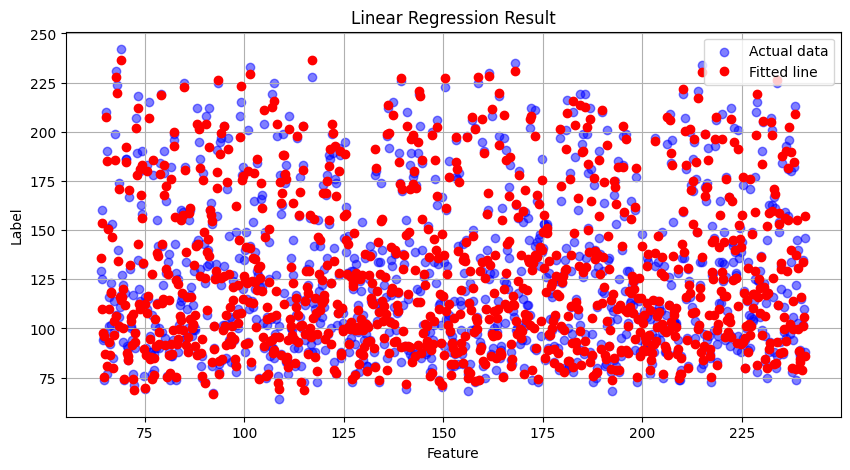

In [19]:
image_path = "C:/Users/qkrqu/OneDrive/바탕 화면/midproject/cushion1/cushion1-a-p007.png"
patch_size = (3, 3)
num_patches = 1000
patches = collect_dataset_from_image(image_path, patch_size, num_patches)

# 특성과 레이블 추출
features_causal, features_noncausal, labels = extract_features_labels(patches)

# 입력 X와 출력 y 설정
X_causal = features_causal
y_causal = labels
y_causal = y_causal.reshape(1000, 1)

X_noncausal = features_noncausal
y_noncausal = labels

import numpy as np
import matplotlib.pyplot as plt

def linear_regression_and_plot(X, y):
    """
    선형 회귀를 수행하고, 결과를 시각화합니다.
    Args:
    X (numpy.ndarray): 입력 특성 데이터.
    y (numpy.ndarray): 타겟 레이블 데이터.
    """
    # 절편을 포함한 X 데이터 준비 (04.24 pbm : 최소제곱법을 위한 X concatenate)
    X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    # X_with_intercept = X

    print(np.shape(X_with_intercept))
    print(np.shape(y))

    # 유사 inv 계산을 위한 파라미터 준비 (04.24 pbm : 유사 inv 계산을 위함)
    X_shape = np.shape(X_with_intercept)
    eta = np.eye(X_shape[1])

    # 선형 회귀 매개변수 계산 (정규방정식) (04.24 pbm : 유사 inv 계산 진행함으로 singular matrix로 인한 inv 불가 문제 해결)
    print(X_with_intercept)
    theta_best = np.linalg.inv(X_with_intercept.T @ X_with_intercept + eta) @ X_with_intercept.T @ y

    # 데이터 포인트 그리기 (04.24 pbm : linspace를 100 -> 1000으로 조정 & X_plot을 ground truth에서 진행)
    X_plot = np.linspace(X.min(), X.max(), 1000).reshape(1000, 1)  # 예측을 위한 X 값 범위 생성
    plt.figure(figsize=(10, 5))
    plt.scatter(X_plot, y, color='blue', alpha=0.5, label='Actual data')

    # 예측선 그리기 (04.24 pbm : X_with_intercept와 추정한 theta를 행렬곱)
    y_predict = X_with_intercept @ theta_best  # 예측 Y 값 계산

    plt.plot(X_plot, y_predict, 'ro', label='Fitted line')
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.title('Linear Regression Result')
    plt.legend()
    plt.grid()
    plt.show()

    return theta_best

# 가정: `X_causal` 및 `y_causal`는 이미 정의되어 있음
theta_best_image = linear_regression_and_plot(X_causal, y_causal)

In [20]:
'''
2) Find the solution using gradient descent method with for various step size.
'''

# import numpy as np
# import matplotlib.pyplot as plt

# # 샘플 데이터 생성
# np.random.seed(0)
# x = 2.5 * np.random.randn(100) + 1.5
# res = 0.5 * np.random.randn(100)
# y = 2 + 0.3 * x + res

# # 비용 함수 정의
# def compute_cost(X, y, beta):
#     n = len(y)
#     y_pred = X.dot(beta)
#     cost = (1/2*n) * np.sum((y_pred - y) ** 2)
#     return cost

# # 경사 하강법 구현
# def gradient_descent(X, y, beta, learning_rate, iterations):
#     n = len(y)
#     cost_history = np.zeros(iterations)

#     for i in range(iterations):
#         y_pred = X.dot(beta)
#         loss = y_pred - y
#         gradient = X.T.dot(loss) / n
#         beta -= learning_rate * gradient
#         cost_history[i] = compute_cost(X, y, beta)

#     return beta, cost_history

# # 경사 하강법 실행
# X = np.vstack([x, np.ones(len(x))]).T
# beta_init = np.random.randn(2)

# iterations = 100
# learning_rates = [0.001, 0.01, 0.05, 0.1]

# plt.figure(figsize=(10, 6))

# for lr in learning_rates:
#     beta, cost_history = gradient_descent(X, y, beta_init, lr, iterations)
#     plt.plot(range(iterations), cost_history, label=f'LR={lr}')

# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.title('Effect of Learning Rate on Convergence')
# plt.legend()
# plt.show()


'\n2) Find the solution using gradient descent method with for various step size.\n'

In [21]:
'''
3) Draw the estimated parameters for each step of gradient descent.
'''
import numpy as np
import matplotlib.pyplot as plt



In [22]:
'''
4) We can roughly find out the optimal step size for each iteration
by attempting multiple step-size simultaneously as the following figure.
Find out the efficiency of gradient descent method for various step sizes.
  '''

'\n4) We can roughly find out the optimal step size for each iteration\nby attempting multiple step-size simultaneously as the following figure.\nFind out the efficiency of gradient descent method for various step sizes.\n  '